In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _pickle

In [9]:
with open('all_data', 'rb') as f:
    df = _pickle.load(f)
df.head()

,url,İlan no,Son Güncelleme Tarihi,İlan Durumu,Konut Şekli,Oda + Salon Sayısı,Brüt / Net M2,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,...,Aidat,Depozito,Tapu Durumu,Krediye Uygunluk,Takas,Kira Getirisi,map_url,coordinates,latitude,longitude
0,https://www.hepsiemlak.com/istanbul-sisli-esen...,8272-25937,24-01-2023,Kiralık,Residence,2 + 1,\n190m2\n \n/170m2\n,7. Kat,20 Yaşında,Merkezi,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps?q&layer=c&cbll=41....,"41.07821142677446,29.00995194911936&cbp",41.078211,29.009952
1,https://www.hepsiemlak.com/istanbul-besiktas-u...,31303-139860,19-01-2023,Kiralık,Daire,4 + 1,\n220m2\n \n/190m2\n,4. Kat,16 Yaşında,Kombi,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps?q&layer=c&cbll=41....,"41.06576007040276,29.02874662963864&cbp",41.065760,29.028747
2,https://www.hepsiemlak.com/istanbul-besiktas-u...,31303-139854,23-01-2023,Kiralık,Daire,3 + 2,\n235m2\n \n/190m2\n,3. Kat,32 Yaşında,Merkezi,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps?q&layer=c&cbll=41....,"41.06446084770524,29.030506158752367&cbp",41.064461,29.030506
3,https://www.hepsiemlak.com/istanbul-besiktas-u...,31303-139729,11-01-2023,Kiralık,Daire,3 + 1,\n135m2\n \n/110m2\n,2. Kat,35 Yaşında,Merkezi,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps?q&layer=c&cbll=41....,"41.06492369873893,29.030248666686973&cbp",41.064924,29.030249
4,https://www.hepsiemlak.com/istanbul-besiktas-u...,31303-139837,23-01-2023,Kiralık,Daire,3 + 1,\n270m2\n \n/250m2\n,2. Kat,35 Yaşında,Merkezi,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps?q&layer=c&cbll=41....,"41.06429844304588,29.030806566162074&cbp",41.064298,29.030807


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    11450 non-null  object 
 1   İlan no                11450 non-null  object 
 2   Son Güncelleme Tarihi  11450 non-null  object 
 3   İlan Durumu            11450 non-null  object 
 4   Konut Şekli            11450 non-null  object 
 5   Oda + Salon Sayısı     11450 non-null  object 
 6   Brüt / Net M2          11450 non-null  object 
 7   Bulunduğu Kat          10870 non-null  object 
 8   Bina Yaşı              11450 non-null  object 
 9   Isınma Tipi            11450 non-null  object 
 10  Kat Sayısı             11433 non-null  object 
 11  Eşya Durumu            10815 non-null  object 
 12  Banyo Sayısı           11439 non-null  object 
 13  Yapı Tipi              7928 non-null   object 
 14  Yapının Durumu         7938 non-null   object 
 15  Ku

drop columns that either do not contain information about the target or cannot be used in production

In [11]:
df.loc[:10, 'short_info']

0     [İstanbul, Şişli, Esentepe, Kiralık, Residence...
1     [İstanbul, Beşiktaş, Ulus, Kiralık, Daire, 4+1...
2     [İstanbul, Beşiktaş, Ulus, Kiralık, Daire, 3+2...
3     [İstanbul, Beşiktaş, Ulus, Kiralık, Daire, 3+1...
4     [İstanbul, Beşiktaş, Ulus, Kiralık, Daire, 3+1...
5     [İstanbul, Beşiktaş, Etiler, Kiralık, Residenc...
6     [İstanbul, Beşiktaş, Levent, Kiralık, Residenc...
7     [İstanbul, Şişli, Meşrutiyet, Kiralık, Daire, ...
8     [İstanbul, Beşiktaş, Levent, Kiralık, Residenc...
9     [İstanbul, Kadıköy, Suadiye, Kiralık, Daire, 3...
10    [İstanbul, Kadıköy, Suadiye, Kiralık, Daire, 3...
Name: short_info, dtype: object

In [12]:
df.drop(columns=['Kira Getirisi', 'Takas', 'Krediye Uygunluk', 'Tapu Durumu', 'Depozito', 'Aidat', 'short_info', 
                 'map_url', 'İlan no', 'url', 'coordinates'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Son Güncelleme Tarihi  11450 non-null  object 
 1   İlan Durumu            11450 non-null  object 
 2   Konut Şekli            11450 non-null  object 
 3   Oda + Salon Sayısı     11450 non-null  object 
 4   Brüt / Net M2          11450 non-null  object 
 5   Bulunduğu Kat          10870 non-null  object 
 6   Bina Yaşı              11450 non-null  object 
 7   Isınma Tipi            11450 non-null  object 
 8   Kat Sayısı             11433 non-null  object 
 9   Eşya Durumu            10815 non-null  object 
 10  Banyo Sayısı           11439 non-null  object 
 11  Yapı Tipi              7928 non-null   object 
 12  Yapının Durumu         7938 non-null   object 
 13  Kullanım Durumu        10660 non-null  object 
 14  Cephe                  7986 non-null   object 
 15  Ya

# initial exploration of the target variable

In [15]:
df['rent'].describe()

count    1.145000e+04
mean     8.580099e+04
std      2.133631e+06
min      1.000000e+00
25%      1.100000e+04
50%      1.800000e+04
75%      3.500000e+04
max      2.000000e+08
Name: rent, dtype: float64

In [16]:
q1, q3 = df['rent'].describe()['25%'], df['rent'].describe()['75%']
IQR = q3 - q1
print(f'interquartile range: {IQR}')
print(f'num small outliers:', sum(df['rent'] < q1-1.5*IQR))
print(f'num large outliers:', sum(df['rent'] > q3+1.5*IQR))

interquartile range: 24000.0
num small outliers: 0
num large outliers: 1187


In [17]:
q3+1.5*IQR

71000.0

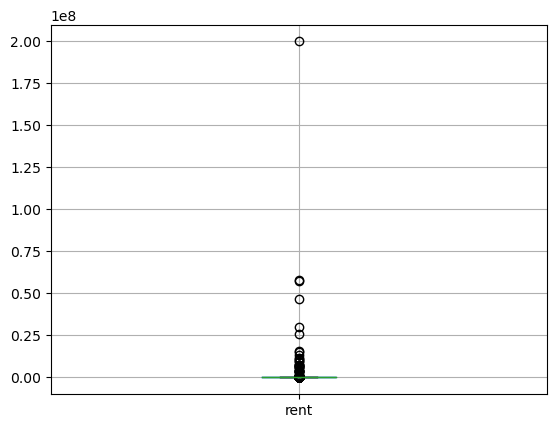

In [18]:
df.boxplot(column='rent')
plt.show()

In [19]:
def plot_target(threshold):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    mask = df['rent'] <= threshold
    print(f'threshold: {threshold}')
    print(f'total dropped: {len(df)-sum(mask)}')

    df[mask].boxplot(column='rent', ax=axes[0])
    df[mask].hist(column='rent', ax=axes[1])
    plt.show()

threshold: 1000000.0
total dropped: 33


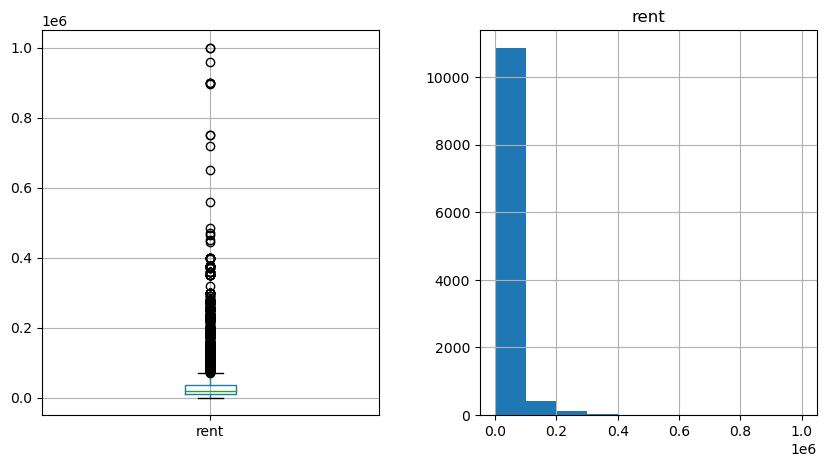

threshold: 150000.0
total dropped: 305


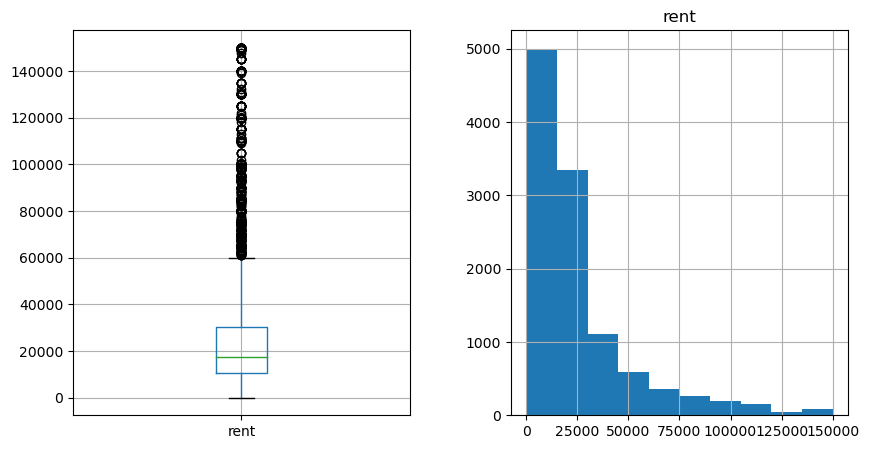

In [21]:
plot_target(1e6)
plot_target(1.5e5)

threshold: 100000.0
total dropped: 608


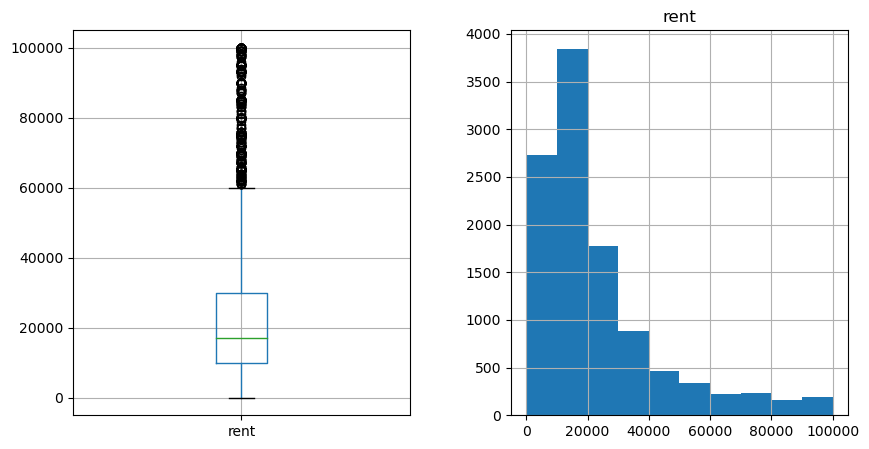

threshold: 10000.0
total dropped: 8719


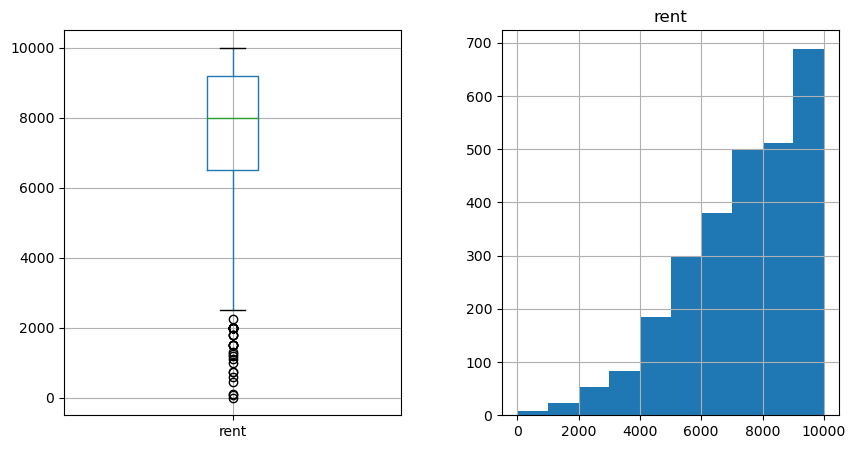

In [22]:
plot_target(1e5)
plot_target(1e4)

threshold: 71000.0
total dropped: 1187


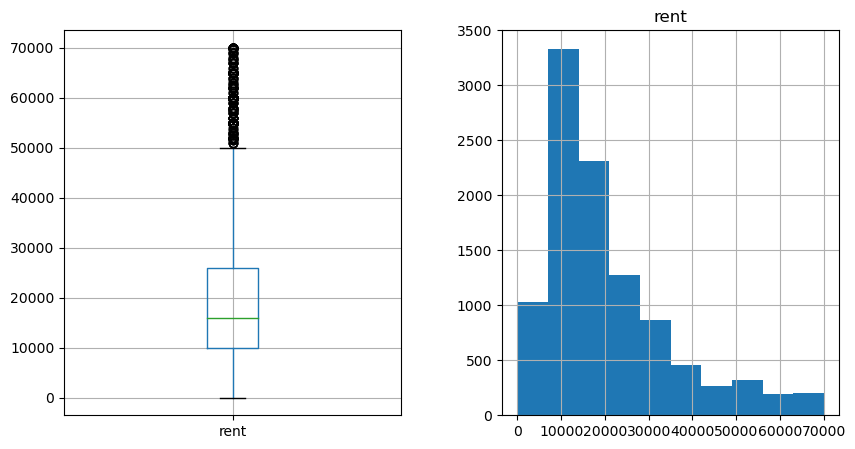

In [23]:
plot_target(q3+1.5*IQR)

threshold: 85000.0
total dropped: 863


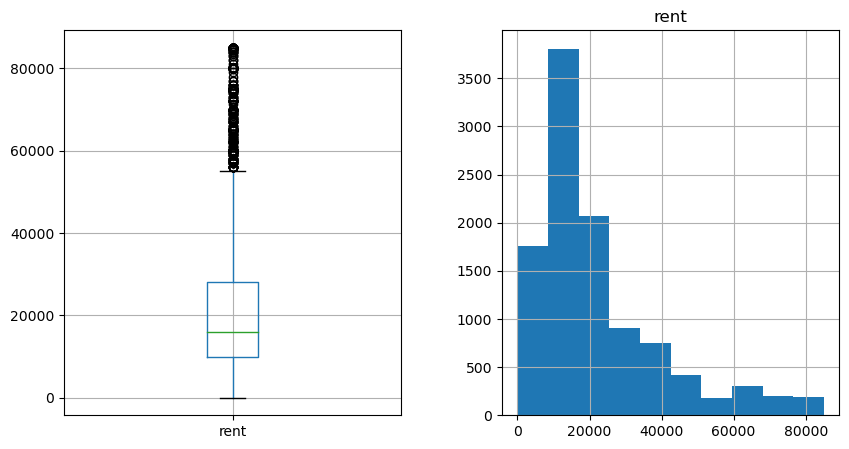

In [24]:
plot_target(8.5e4)

In [37]:
outliers = df[(df['rent'] > q3+1.5*IQR) & (df['rent'] < 1.5e5)]
len(outliers)

831

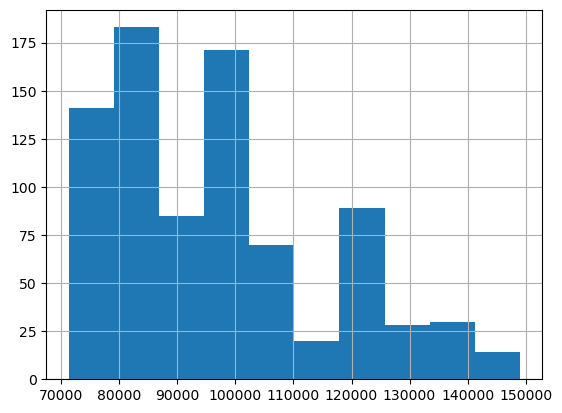

In [38]:
outliers['rent'].hist()
plt.show()

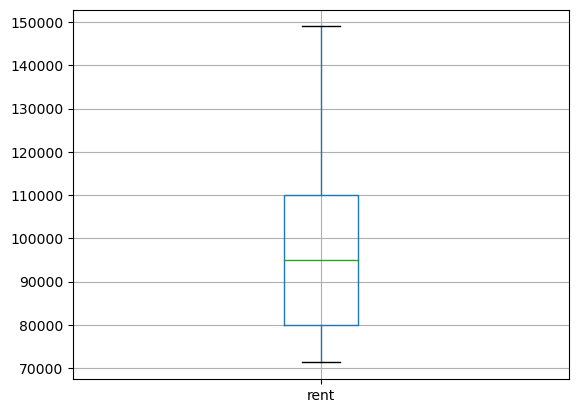

In [39]:
outliers.boxplot('rent')
plt.show()

we separate the df into two for the regular and outlier data. outlier data is further trimmed to get rid of the outlier observations with even greater target values

In [41]:
df_outlier = df[(df['rent'] > q3+1.5*IQR) & (df['rent'] < 1.5e5)]
df_regular = df[df['rent'] <= q3+1.5*IQR]

# outlier data

In [42]:
df_outlier['rent'].describe()

count       831.000000
mean      97091.475331
std       19042.736072
min       71300.000000
25%       80000.000000
50%       95000.000000
75%      110000.000000
max      149000.000000
Name: rent, dtype: float64

# regular data 

In [43]:
df_regular['rent'].describe()

count    10263.000000
mean     20689.897106
std      14459.255332
min          1.000000
25%      10000.000000
50%      16000.000000
75%      26000.000000
max      70000.000000
Name: rent, dtype: float64

export the separated dataframes

In [44]:
with open('regular_data', 'wb') as f:
    _pickle.dump(df_regular, f)
    
with open('outlier_data', 'wb') as f:
    _pickle.dump(df_outlier, f)